In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew


pd.set_option('display.max_columns', None)

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn import set_config
from sklearn.model_selection import train_test_split

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,ElasticNet, LassoLars,Lasso, SGDRegressor, Ridge, LogisticRegression, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import lightgbm as lgb
import xgboost as xg


from category_encoders import BinaryEncoder


set_config(display='diagram')

%matplotlib inline


In [63]:
#import data from file
df_train = pd.read_csv('./train.csv').drop(['Id'], axis=1)
df_test = pd.read_csv('./test.csv').drop(['Id'], axis=1)

df_test
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,

In [64]:
# know about data
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## analyze y and feature

1. y distribution
2. correlation between features
3. correlation between feature and y

(array([  5.,   6.,  11.,  27.,  50.,  49.,  98., 134., 148., 125., 107.,
        111., 106.,  70.,  53.,  51.,  48.,  45.,  31.,  27.,  28.,  14.,
         13.,  22.,  11.,  13.,   4.,   6.,   9.,   8.,   5.,   3.,   4.,
          3.,   2.,   2.,   1.,   1.,   1.,   0.,   0.,   1.,   0.,   2.,
          0.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   2.]),
 array([ 34900.        ,  46901.66666667,  58903.33333333,  70905.        ,
         82906.66666667,  94908.33333333, 106910.        , 118911.66666667,
        130913.33333333, 142915.        , 154916.66666667, 166918.33333333,
        178920.        , 190921.66666667, 202923.33333333, 214925.        ,
        226926.66666667, 238928.33333333, 250930.        , 262931.66666667,
        274933.33333333, 286935.        , 298936.66666667, 310938.33333333,
        322940.        , 334941.66666667, 346943.33333333, 358945.        ,
        370946.66666667, 382948.33333333, 394950.        ,

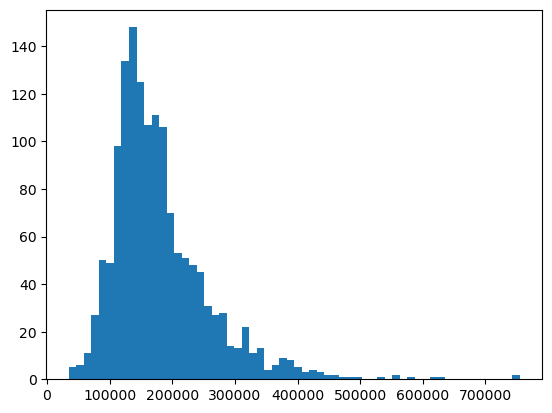

In [65]:
plt.hist(df_train['SalePrice'],bins=60)

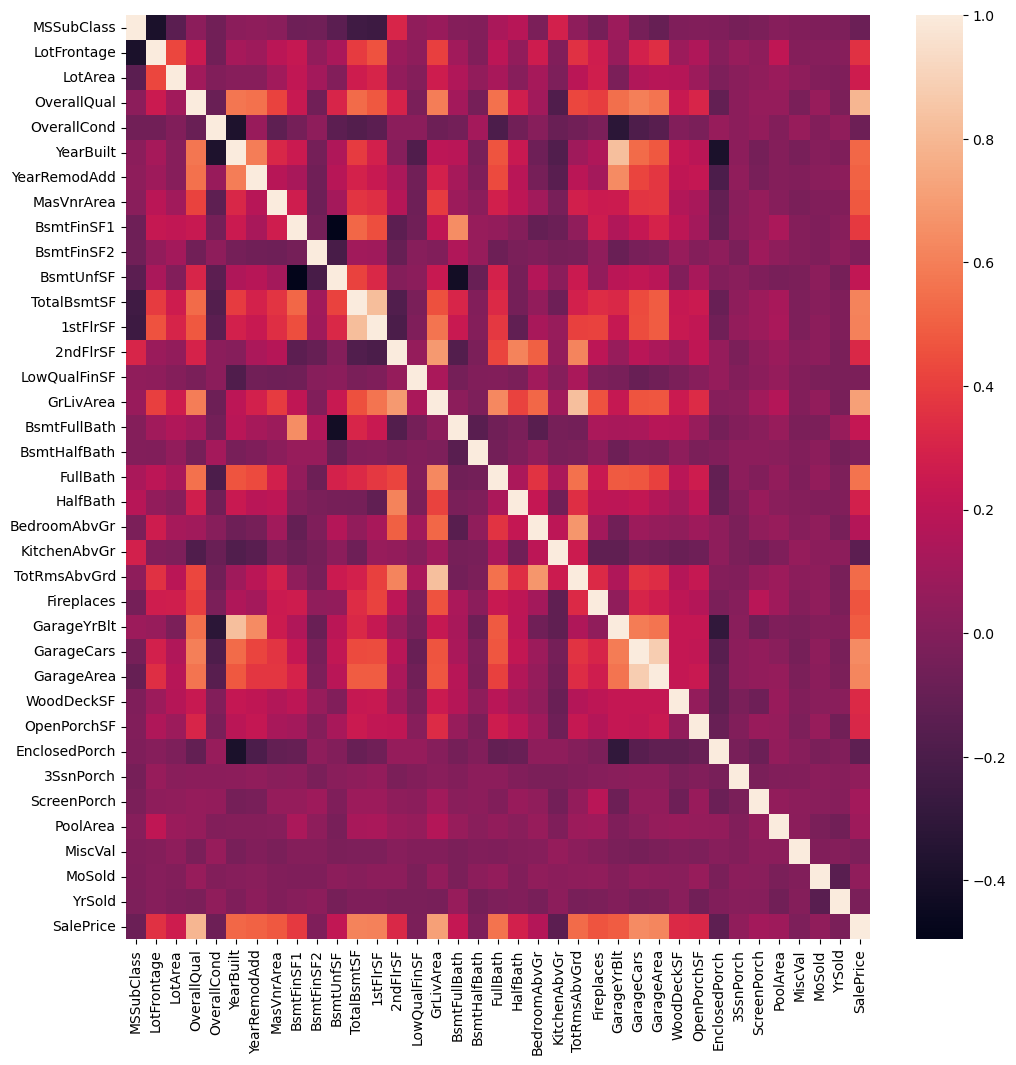

In [66]:
corrmat = df_train.corr()
plt.subplots(figsize = (12,12))
sns.heatmap(corrmat)
plt.show()

<AxesSubplot:>

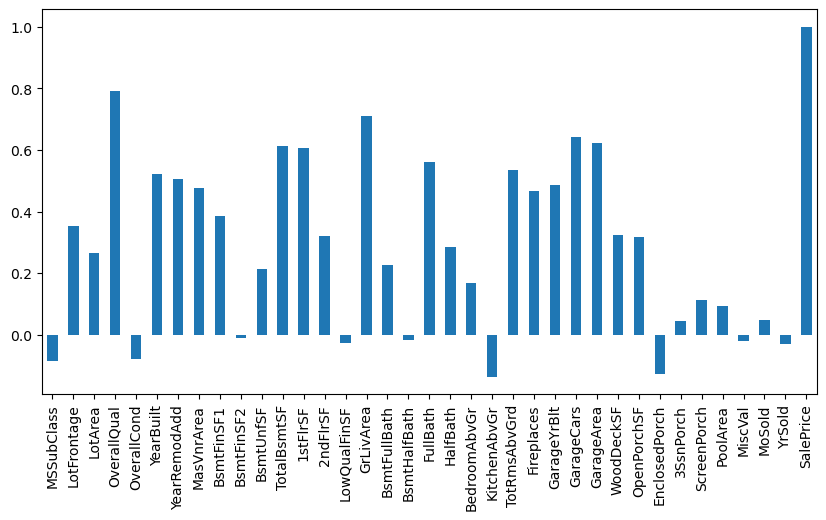

In [67]:
corrmat['SalePrice'].plot(kind='bar',figsize=(10,5))

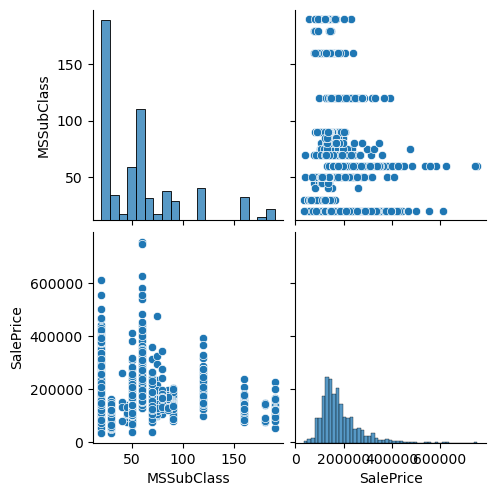


 ---- train set ----
count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64


20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64


MSSubClass
20     185224.811567
30      95829.724638
40     156125.000000
45     108591.666667
50     143302.972222
60     239948.501672
70     166772.416667
75     192437.500000
80     169736.551724
85     147810.000000
90     133541.076923
120    200779.080460
160    138647.380952
180    102300.000000
190    129613.333333
Name: SalePrice, dtype: float64


1.4062101115313512

 ---- test set ----
count    1459.000000
mean       57.378341
std        42.746880
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSS

In [68]:
#examine every feature in train and test data
def feature_desc(feature):
    sns.pairplot(df_train[[feature,'SalePrice']])
    plt.show()
    
    print('\n ---- train set ----')
    print(df_train[feature].describe())
    print('\n')
    print(df_train[feature].value_counts())
    print('\n')
    print(df_train.groupby(feature)['SalePrice'].mean())
    print('\n')
    print(skew(df_train[feature]))    
    
    print('\n ---- test set ----')
    print(df_test[feature].describe())
    print('\n')
    print(df_test[feature].value_counts())
    print('\n')
    print(skew(df_test[feature]))


feature_desc('MSSubClass')

# Fill in missing values	

- For continuous numerical features, replace missing values with the mean
- For categorical features with skewed distributions, replace missing values with the most frequent category


- delete na
#df_res_na = df_res.drop(axis=1, columns ='PoolQC').dropna()
#df_res.dropna()
df_res_na.info()

- fillna with -1 or 0 as desription
df_res_na = df_res.fillna(-1)
df_res_na.info()

- replace with most frequent value
df_res_na = pd.read_excel('./na.xlsx')
df_res_na.info()

In [69]:
#fill na
#utilities almost has only one kind category
#for some feature  0 equal to none nan
df_train['LotFrontage']=df_train['LotFrontage'].fillna(70) #mean
df_test['LotFrontage']=df_test['LotFrontage'].fillna(70) 
df_test['MSZoning']=df_test['MSZoning'].fillna("C (all)") 
df_test['GarageCars']=df_test['GarageCars'].fillna(0) 
df_test['GarageArea']=df_test['GarageArea'].fillna(0) 
df_test['Functional']=df_test['Functional'].fillna("Typ") 
df_test['SaleType']=df_test['SaleType'].fillna("WD") 
df_test['SaleCondition']=df_test['SaleCondition'].fillna("Normal")
df_train['Fence']=df_train['Fence'].fillna(-1) 
df_test['Fence']=df_test['Fence'].fillna(-1) 
df_train['Electrical'] = df_train['Electrical'].fillna("SBrkr")
df_train['FireplaceQu'] = df_train['FireplaceQu'].fillna(-1)
df_test['FireplaceQu'] = df_test['FireplaceQu'].fillna(-1)
df_train['GarageType'] = df_train['GarageType'].fillna("None")
df_test['GarageType'] = df_test['GarageType'].fillna("None")
df_train['GarageQual'] = df_train['GarageQual'].fillna(-1)
df_test['GarageQual'] = df_test['GarageQual'].fillna(-1)
df_train['GarageCond'] = df_train['GarageCond'].fillna(-1)
df_test['GarageCond'] = df_test['GarageCond'].fillna(-1)
df_train['GarageFinish'] = df_train['GarageFinish'].fillna("None")
df_test['GarageFinish'] = df_test['GarageFinish'].fillna("None")
df_test['Exterior1st'] = df_test['Exterior1st'].fillna("VinylSd")
df_test['Exterior2nd']= df_test['Exterior2nd'].fillna("VinylSd")
df_train['MasVnrType'] = df_train['MasVnrType'].fillna("None")
df_test['MasVnrType'] = df_test['MasVnrType'].fillna("None")
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(0)
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(0)
df_test['BsmtHalfBath']=df_test['BsmtHalfBath'].fillna(0) 
df_test['BsmtFullBath']=df_test['BsmtFullBath'].fillna(0) 
df_test['KitchenQual']=df_test['KitchenQual'].fillna("Gd") 
df_test['TotalBsmtSF']=df_test['TotalBsmtSF'].fillna(0) 
df_test['BsmtUnfSF']=df_test['BsmtUnfSF'].fillna(0)
df_test['BsmtFinSF1']=df_test['BsmtFinSF1'].fillna(0) 
df_test['BsmtFinSF2']= df_test['BsmtFinSF2'].fillna(0) 
df_test['BsmtQual']=df_test['BsmtQual'].fillna(-1) 
df_train['BsmtQual']=df_train['BsmtQual'].fillna(-1)
df_test['BsmtCond']= df_test['BsmtCond'].fillna(-1)
df_train['BsmtCond']= df_train['BsmtCond'].fillna(-1)
df_test['BsmtExposure']= df_test['BsmtExposure'].fillna(-1) 
df_train['BsmtExposure']= df_train['BsmtExposure'].fillna(-1) 
df_test['Utilities']= df_test['Utilities'].fillna("AllPub") 
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(1895)
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].fillna(1895)


In [70]:
#fix outliers
#lotfrontage, use same value of other observation with same lot area

df_test.loc[df_test.GarageYrBlt==2207,'GarageYrBlt'] = 2007 
df_test.loc[df_test.LotArea==1533,'LotFrontage'] = 21 
df_train.loc[df_train.LotArea>40000,'LotArea'] = 40000
df_test.loc[df_test.LotArea>40000,'LotArea'] = 40000
df_train.loc[df_train.LotFrontage>150,'LotFrontage'] = 150
df_test.loc[df_test.LotFrontage>150,'LotFrontage'] = 150
df_train.loc[df_train["1stFlrSF"]>3000,'1stFlrSF'] = 3000
df_test.loc[df_test["1stFlrSF"]>3000,'1stFlrSF'] = 3000
df_train.loc[df_train["GrLivArea"]>4000,'GrLivArea'] = 4000
df_test.loc[df_test["GrLivArea"]>4000,'GrLivArea'] = 4000
df_train.loc[df_train["TotRmsAbvGrd"]>12,'TotRmsAbvGrd'] = 12
df_test.loc[df_test["TotRmsAbvGrd"]>12,'TotRmsAbvGrd'] = 12
df_train.loc[df_train["BsmtFinSF1"]>2200,'BsmtFinSF1'] = 2200
df_test.loc[df_test["BsmtFinSF1"]>2200,'BsmtFinSF1'] = 2200
df_train.loc[df_train["TotalBsmtSF"]>2500,'TotalBsmtSF'] = 2500
df_test.loc[df_test["TotalBsmtSF"]>2500,'TotalBsmtSF'] = 2500
df_train.loc[df_train["GarageCars"]>3,'GarageCars'] = 3
df_test.loc[df_test["GarageCars"]>3,'GarageCars'] = 3
df_train.loc[df_train["GarageArea"]>1000,'GarageArea'] = 1000
df_test.loc[df_test["GarageArea"]>1000,'GarageArea'] = 1000

In [71]:
#Feature Extraction (Converting Years to Ages)
df_train["Age"] = 2011 - df_train["YearBuilt"]
df_test["Age"] = 2011 - df_test["YearBuilt"]

df_train["RemodAfter"] = df_train["YearRemodAdd"] - df_train["YearBuilt"]
df_train["AgeRemodAdd"] = 2011 - df_train["YearRemodAdd"]

df_test["RemodAfter"] = df_test["YearRemodAdd"] - df_test["YearBuilt"]
df_test.loc[df_test.RemodAfter<0,'RemodAfter'] = 0
df_test["AgeRemodAdd"] = 2011 - df_test["YearRemodAdd"]

df_train["Age_Sold"] = df_train["YrSold"] - df_train["YearBuilt"] 
df_test["Age_Sold"] = df_test["YrSold"] - df_test["YearBuilt"]
df_test.loc[df_test.Age_Sold<0,'Age_Sold'] = 0

df_train["Sold_before"] = 2011 - df_train["YrSold"]
df_test["Sold_before"] = 2011 - df_test["YrSold"] 

df_train['Age_Garage'] = 2011 - df_train['GarageYrBlt']
df_test['Age_Garage'] = 2011 - df_test['GarageYrBlt']
df_train['Age_Garage_Sold'] = df_train["YrSold"] - df_train['GarageYrBlt']
df_test['Age_Garage_Sold'] = df_test["YrSold"] - df_test['GarageYrBlt']

df_train['TotalPorch']=df_train['EnclosedPorch'] + df_train['OpenPorchSF'] + df_train['ScreenPorch'] + df_train['3SsnPorch'] 
df_test['TotalPorch']=df_test['EnclosedPorch'] + df_test['OpenPorchSF'] + df_test['ScreenPorch'] + df_test['3SsnPorch'] 

df_train['TotalBath'] = df_train['FullBath']+ df_train['HalfBath']+ df_train['BsmtFullBath']+ df_train['BsmtHalfBath']
df_test['TotalBath'] = df_test['FullBath']+ df_test['HalfBath']+ df_test['BsmtFullBath']+ df_test['BsmtHalfBath']

In [72]:
#Update some values that is not exist one of two datasets
df_test['MSSubClass'] = df_test['MSSubClass'].replace(["150"], ["160"])
df_train['HouseStyle'] = df_train['HouseStyle'].replace(["2.5Fin"], ["2Story"])
df_train['Exterior1st'] = df_train['Exterior1st'].replace(['Stone', 'ImStucc'],['CemntBd', 'Stucco'])
df_train['Electrical'] = df_train['Electrical'].replace(["Mix","FuseF","FuseP"], ["SBrkr","FuseA","FuseA"])
df_test['Electrical'] = df_test['Electrical'].replace(["Mix","FuseF","FuseP"], ["SBrkr","FuseA","FuseA"])
df_test['BsmtCond'] = df_test['BsmtCond'].replace(["Ex"], ["Gd"])
# df_train['BsmtCond'] = df_train['BsmtCond'].replace(["Po"], ["None"])
df_train['GarageQual'] = df_train['GarageQual'].replace(["Ex"], ["Gd"])
df_train['GarageCond'] = df_train['GarageCond'].replace(["Ex"], ["Gd"])
df_test['GarageCond'] = df_test['GarageCond'].replace(["Ex"], ["Gd"])


# preprocessing categorical feature
https://medium.com/analytics-vidhya/ways-to-handle-categorical-column-missing-data-its-implementations-15dc4a56893


- frequent categorical imputation
relacing nan values with the most frequent category

disadvantage: 

if the features having too many nan, it will cause bias, also it distorts the relation of the most frequent label.

- create a new column to impute nan category

disad:

curse of dimensionality, and missing data should be large enough.

- create a new category for nan values

In [73]:
#turn categorical feature to ordinal feature
def ordinal_cate(df):
    conv_dict1 = {
        "Ex":0,
        "Gd":1,
        "TA":2,
        "Fa":3,
        "Po":4            
    }


    cat_type1 = ['ExterQual',
     'ExterCond',
     'BsmtQual',
     'BsmtCond',
    'HeatingQC','KitchenQual','FireplaceQu',
     'GarageQual',
     'GarageCond','PoolQC','BsmtExposure']

    for i in cat_type1:
        df[i].replace(conv_dict1,inplace = True)


    conv_dict2 = {
        "Gd":0,
        "Av":1,
        "Mn":2,
        "No":3
    }
    cat_type2 = ['BsmtExposure']

    for i in cat_type2:
        df[i].replace(conv_dict2,inplace = True)

    conv_dict3 = {
        "GLQ":0,
        "ALQ":1,
        "BLQ":2,
        "Rec":3,
        "LwQ":4,
        "Unf":5

    }
    cat_type3 = ['BsmtFinType1','BsmtFinType2']

    for i in cat_type3:
        df[i].replace(conv_dict3,inplace = True)

    conv_dict4 = {
        "Y":1,
        "N":0

    }
    cat_type4 = ['CentralAir']

    for i in cat_type4:
        df[i].replace(conv_dict4,inplace = True)

    conv_dict5 = {
        "SBrkr":0,
        "FuseA":1,
        "FuseF":2,
        "FuseP":3,
        "Mix":4      
    }

    df['Electrical'].replace(conv_dict5,inplace = True)

    conv_dict6 = {
        "Typ":0,
        "Min1":1,
        "Min2":2,
        "Mod":3,
        "Maj1":4,
        "Maj2":5,
        "Sev":6,
        "Sal":7
    }

    df['Functional'].replace(conv_dict6,inplace = True)

    conv_dict7 = {
        "Y":0,
        "P":1,
        "N":2
    }

    df['PavedDrive'].replace(conv_dict7,inplace = True)

    conv_dict8 = {
        "GdPrv":0,
        "MnPrv":1,
        "GdWo":2,
        "MnWw":3
    }

    df['Fence'].replace(conv_dict8,inplace = True)
    
    return df


In [74]:
df_train = ordinal_cate(df_train)
df_test = ordinal_cate(df_test)


In [75]:
# pop：从dataframe中去掉saleprice
y = df_train.pop("SalePrice")

In [76]:
# Check Missing values
print(df_train.isnull().sum().sort_values(ascending=False).head(10))
print(df_test.isnull().sum().sort_values(ascending=False).head(10))

PoolQC          1453
MiscFeature     1406
Alley           1369
BsmtFinType2      38
BsmtFinType1      37
GarageType         0
GarageCond         0
GarageQual         0
GarageArea         0
GarageCars         0
dtype: int64
PoolQC          1456
MiscFeature     1408
Alley           1352
BsmtFinType2      42
BsmtFinType1      42
GarageType         0
GarageCond         0
GarageQual         0
GarageArea         0
GarageCars         0
dtype: int64


In [77]:
#drop missing value and irrelevent feature

df_train = df_train.dropna(axis=1) 
df_test = df_test.dropna(axis=1)

df_train = df_train.drop(["YearBuilt","YearRemodAdd","Street","Condition2","LowQualFinSF","RoofMatl","Exterior2nd","OpenPorchSF","EnclosedPorch",
                    "3SsnPorch","ScreenPorch","PoolArea","MiscVal","YrSold","Utilities","Heating","KitchenAbvGr","GarageYrBlt"], axis=1) 
df_test = df_test.drop(["YearBuilt","YearRemodAdd","Street","Condition2","LowQualFinSF","RoofMatl","Exterior2nd","OpenPorchSF","EnclosedPorch",
                    "3SsnPorch","ScreenPorch","PoolArea","MiscVal","YrSold","Utilities","Heating","KitchenAbvGr","GarageYrBlt"], axis=1) 

# one hot encoding

In [78]:
cols = df_train.columns
categorical_columns = df_train.select_dtypes('object').columns
categorical_columns = categorical_columns.insert(0,'MSSubClass') # mssubclass is not numerical feature
numeric_columns = df_train.select_dtypes(['int','float']).columns


category_analysis = pd.DataFrame(categorical_columns, columns = ['Feature'])
unique_values = []
unique_counts = []

for i in categorical_columns:
    unique_values.append(df_train[i].unique())
    unique_counts.append(len(df_train[i].unique()))

category_analysis["Categories"] = unique_values
category_analysis["Number"] = unique_counts
category_analysis

,Feature,Categories,Number
0,MSSubClass,"[60, 20, 70, 50, 190, 45, 90, 120, 30, 85, 80,...",15
1,MSZoning,"[RL, RM, C (all), FV, RH]",5
2,LotShape,"[Reg, IR1, IR2, IR3]",4
3,LandContour,"[Lvl, Bnk, Low, HLS]",4
4,LotConfig,"[Inside, FR2, Corner, CulDSac, FR3]",5
5,LandSlope,"[Gtl, Mod, Sev]",3
6,Neighborhood,"[CollgCr, Veenker, Crawfor, NoRidge, Mitchel, ...",25
7,Condition1,"[Norm, Feedr, PosN, Artery, RRAe, RRNn, RRAn, ...",9
8,BldgType,"[1Fam, 2fmCon, Duplex, TwnhsE, Twnhs]",5
9,HouseStyle,"[2Story, 1Story, 1.5Fin, 1.5Unf, SFoyer, SLvl,...",7


In [79]:
#convert categorical variables into one hot encode

df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

In [88]:
# transform skewed feature
skewed_feats = df_train.apply(lambda x:skew(x.dropna())).sort_values(ascending = False)
print("\nSkew in numerical features top10: \n")
skewness = pd.DataFrame({'Skew':skewed_feats})
print(skewness.head(10))

df_train_skewed = df_train.copy()
df_test_skewed = df_test.copy()

print("\n")
print("There are {} skewed numerical features to Log1p transform.".format(skewness.shape[0]))

skewed_features = skewness.index

for feat in skewed_features:
    df_train_skewed[feat] = np.log1p(df_train_skewed[feat])
    df_test_skewed[feat] = np.log1p(df_test_skewed[feat])
    

y_log = np.log1p(y)
df_test_skewed=df_test_skewed.replace(-np.Inf, 0)
df_train_skewed=df_train_skewed.replace(-np.Inf, 0)


Skew in numerical features top10: 

                            Skew
Exterior1st_CBlock     38.170678
Exterior1st_AsphShn    38.170678
RoofStyle_Shed         26.962963
Exterior1st_BrkComm    26.962963
SaleType_Con           26.962963
Neighborhood_Blueste   26.962963
Condition1_RRNe        26.962963
SaleType_Oth           21.992470
Foundation_Wood        21.992470
SaleCondition_AdjLand  19.026370


There are 170 skewed numerical features to Log1p transform.


C:\Users\YOITE\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


# train model

In [101]:
#run cross validation for each models

def run_cvs(X,y):
    baseline = ElasticNet(random_state=0,max_iter=10e7,alpha=0.0003)
    baseline_score = cross_val_score(baseline, X, y, cv=10)
    print("ENet avg:",np.mean(baseline_score))

    
    baseline = Ridge(alpha = 1, random_state=0)
    baseline_score = cross_val_score(baseline, X, y, cv=10)
    print("Ridge avg:",np.mean(baseline_score))   
    
    baseline = Lasso(alpha = 0.0001,random_state=0)
    baseline_score = cross_val_score(baseline, X, y, cv=10)
    print("Lasso avg:",np.mean(baseline_score))
    
    baseline = KernelRidge(alpha=0.1)
    baseline_score = cross_val_score(baseline, X, y, cv=10)
    print("KRR avg:",np.mean(baseline_score))

    baseline = lgb.LGBMRegressor(learning_rate=0.01,num_leaves=4,n_estimators=2000, random_state=0)
    baseline_score = cross_val_score(baseline, X, y, cv=10)
    print("LGBM avg:",np.mean(baseline_score))

    baseline = xg.XGBRegressor(learning_rate=0.01,n_estimators=2000, subsample=0.7,colsample_bytree=0.7,random_state=0)
    baseline_score = cross_val_score(baseline, X, y, cv=10)
    print("XGB avg:",np.mean(baseline_score))
    
    baseline = CatBoostRegressor(random_state=0,verbose=0)
    baseline_score = cross_val_score(baseline, X, y, cv=10)
    print("CatB avg:",np.mean(baseline_score))

    baseline = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.02,max_depth=4, max_features='sqrt',
                min_samples_leaf=15, min_samples_split=50,loss='huber', random_state = 0)
    baseline_score = cross_val_score(baseline, X, y, cv=10)
    print("GBR avg:",np.mean(baseline_score))
    
run_cvs(df_train_skewed,y_log) 

ENet avg: 0.8884113227995659
Ridge avg: 0.9028344299479347
Lasso avg: 0.8956710656297169
KRR avg: 0.815280732992204
LGBM avg: 0.8981491783771111
XGB avg: 0.9097819332676368
CatB avg: 0.9116758363725838
GBR avg: 0.9055917503254991


In [104]:
# combine top 3 best models and use average as predict result

def make_submission(X_train, y_train, X_test):    
    sub_df = pd.read_csv('./sample_submission.csv', index_col = "Id")
    
    ridge = Ridge(alpha = 1, random_state=0).fit(X_train,y_train)
    ridge_pred=ridge.predict(X_test)

    xgb = xg.XGBRegressor(learning_rate=0.01,n_estimators=2000, subsample=0.7,colsample_bytree=0.7,random_state=0).fit(X_train,y_train)
    xgb_pred=xgb.predict(X_test)    

    CatB = CatBoostRegressor(random_state=0,verbose=0).fit(X_train,y_train)
    CatB_pred=CatB.predict(X_test)

    
    avg_reuslt=(ridge_pred+xgb_pred+CatB_pred)/4
    sub_df['SalePrice'] = np.exp(avg_reuslt)-1 #convert from log
    sub_df.to_csv("submission.csv")
    
make_submission(df_train_skewed,y_log,df_test_skewed)  